In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

a)

In [63]:
data = pd.read_csv('/content/diabetes.csv')


In [64]:
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [65]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

In [66]:
print("\nMissing values after cleaning:")
print(data.isnull().sum())



Missing values after cleaning:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [67]:
data_imputed = data.fillna(data.mean())


In [68]:
print("\nMissing Values After Handling:")
print(data_imputed.isnull().sum())


Missing Values After Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [69]:
cleaned_filename = 'cleaned_diabetes.csv'
data.to_csv(cleaned_filename, index=False)

In [70]:
cleaned_data = pd.read_csv('/content/cleaned_diabetes.csv')


In [71]:
print("\nAfter loading the cleaned dataset:")
print(cleaned_data.head())


After loading the cleaned dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


a)

In [72]:
np.random.seed(2375)


In [73]:
sample = data.sample(25)


In [74]:
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

In [75]:
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

In [76]:
labels = ['Population Mean', 'Population Highest', 'Sample Mean', 'Sample Highest']
values = [population_mean_glucose, population_highest_glucose, sample_mean_glucose, sample_highest_glucose]

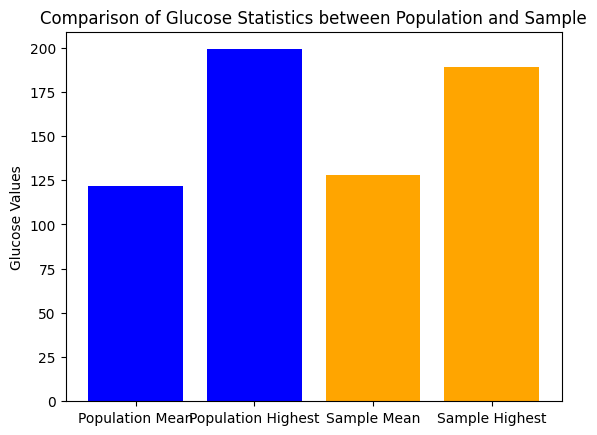

In [77]:
plt.bar(labels, values, color=['blue', 'blue', 'orange', 'orange'])
plt.title('Comparison of Glucose Statistics between Population and Sample')
plt.ylabel('Glucose Values')
plt.show()

b)

In [78]:
cleaned_data = pd.read_csv('/content/cleaned_diabetes.csv')


In [79]:
np.random.seed(2375)


In [80]:
sample = data.sample(25)


In [81]:
population_98th_percentile_bmi = data['BMI'].quantile(0.98)
sample_98th_percentile_bmi = sample['BMI'].quantile(0.98)

In [82]:
labels = ['Population 98th Percentile BMI', 'Sample 98th Percentile BMI']
values = [population_98th_percentile_bmi, sample_98th_percentile_bmi]

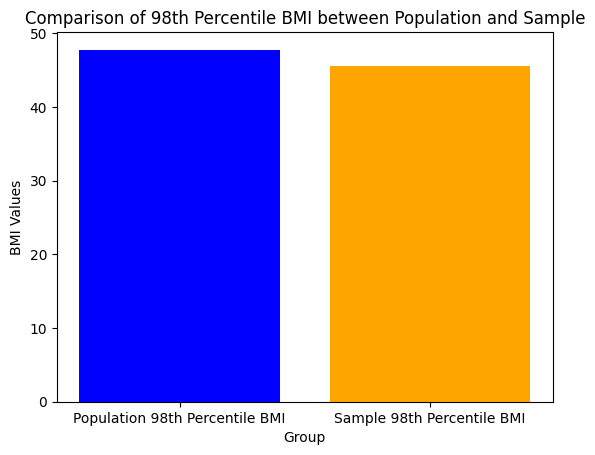

In [83]:
plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Comparison of 98th Percentile BMI between Population and Sample')
plt.xlabel('Group')
plt.ylabel('BMI Values')
plt.show()

C)

In [84]:
np.random.seed(2375)


In [85]:
bootstrap_samples = []
for _ in range(500):
    bootstrap_sample = data['BloodPressure'].sample(150, replace=True)
    bootstrap_samples.append(bootstrap_sample)


In [86]:
bootstrap_means = [sample.mean() for sample in bootstrap_samples]
bootstrap_std_devs = [sample.std() for sample in bootstrap_samples]
bootstrap_percentiles = [np.percentile(sample, 95) for sample in bootstrap_samples]




In [87]:
population_mean = data['BloodPressure'].mean()
population_std_dev = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 95)

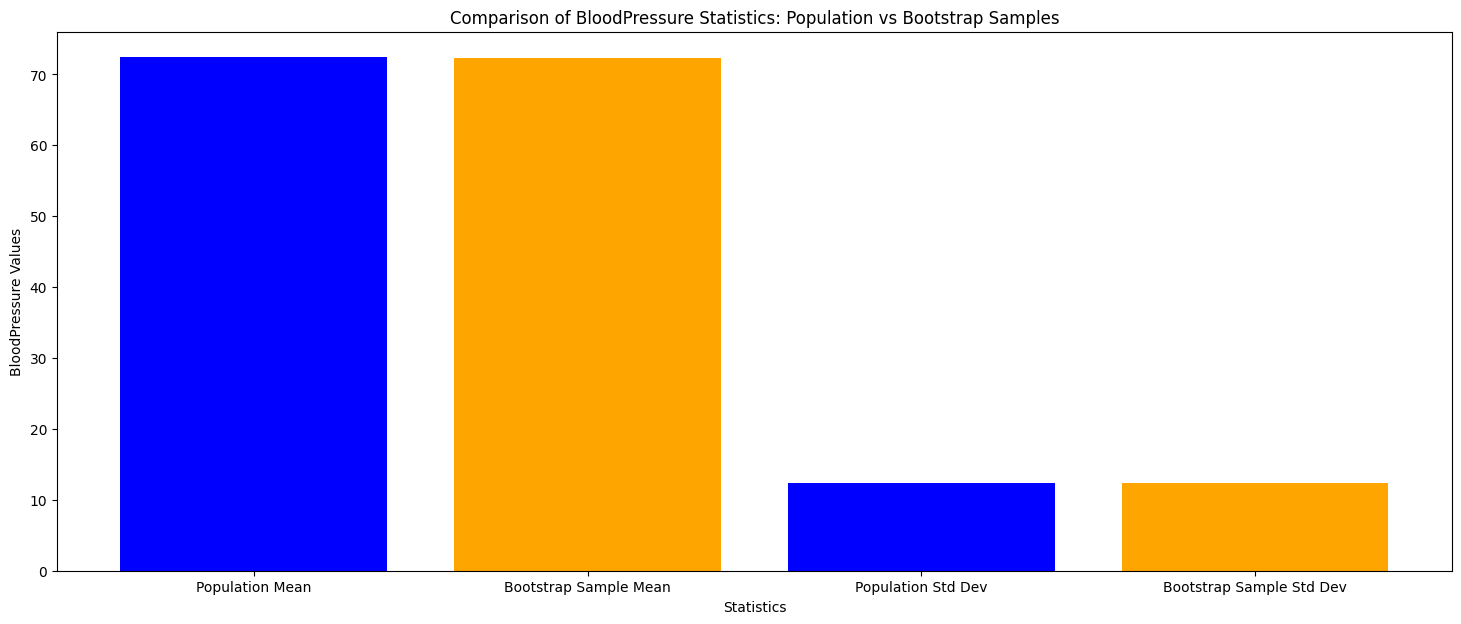

In [88]:
labels = ['Population Mean', 'Bootstrap Sample Mean', 'Population Std Dev', 'Bootstrap Sample Std Dev', 'Population 95th Percentile', 'Bootstrap Sample 95th Percentile']
values = [population_mean, np.mean(bootstrap_means), population_std_dev, np.mean(bootstrap_std_devs), population_percentile, np.mean(bootstrap_percentiles)]
plt.figure(figsize=(18, 7))
plt.bar(labels, values, color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.title('Comparison of BloodPressure Statistics: Population vs Bootstrap Samples')
plt.xlabel('Statistics')
plt.ylabel('BloodPressure Values')
plt.show()

Report of the Findings

Data cleaning Before conducting the analysis, the dataset underwent a cleaning process. Zero values in specific columns (Glucose, BloodPressure, SkinThickness, Insulin, BMI) were treated as missing values and replaced with NaN to ensure data integrity. Bootstrap Analysis Methodology • Number of bootstrap samples: 500 • Sample size: 150 observations per sample • Variable of interest: BloodPressure Results

Average Mean: • Population Mean: 72.40518417462484 • Bootstrap Sample Mean: 72.40630533333333

Standard Deviation: • Population Standard Deviation: 12.38215888359406 • Bootstrap Sample Standard Deviation: 12.357104898946356

95th Percentile: • Population 95th Percentile: 110.0 • Bootstrap Sample 95th Percentile: 110.0 Comparison and Findings The bar plots below illustrate the comparison between the population and bootstrap samples for the 95th percentile, mean, and standard deviation of 'BloodPressure'. • Quantile at 95% Comparison: • The population 95th percentile is 110.0, while the average of the bootstrap sample 95th percentiles is also 110.0. • Mean Comparison: • The population mean is approximately 72.41, and the bootstrap sample mean is approximately 72.41. • Standard Deviation Comparison: • The population standard deviation is approximately 12.38, and the bootstrap sample standard deviation is approximately 12.36.

Conclusion

The analysis reveals close alignment between the population and bootstrap sample statistics for 'BloodPressure.' The bootstrap samples accurately capture the variability present in the population, and there are minimal differences observed in the 95th percentile, mean, and standard deviation.